In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
Capt1=pd.read_csv('../Selected/A8032A31204E.csv')
Capt2=pd.read_csv('../Selected/A8032A311FAA.csv')
Capt3=pd.read_csv('../Selected/C45BBE37B346.csv')
Capt4=pd.read_csv('../Selected/C45BBE39F9AE.csv')
Capt6=pd.read_csv('../Selected/C45BBE39F56A.csv')
Capt7=pd.read_csv('../Selected/C45BBE384CD2.csv')
Capt9=pd.read_csv('../Selected/C45BBE386362.csv')
Capt10=pd.read_csv('../Selected/C45BBE386952.csv')

List_Capt=[Capt1,Capt2,Capt3,Capt4,Capt6,Capt7,Capt9,Capt10]
#liste_df <- split(df, df$ID)

In [17]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39F56A', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE37B346', 'A8032A311FAA']
list_capteurs_dist = {'C45BBE384CD2' : 75, 'C45BBE386362' : 80, 'C45BBE386952' : 65, 'C45BBE39F56A' : 56, 'C45BBE39F9AE' : 13, 'A8032A31204E' : 29, 'C45BBE37B346' : 52, 'A8032A311FAA' : 0}

In [18]:
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  seen_twice = set(x for x in seq if x in seen or seen_add(x))
  return list(seen_twice)

In [36]:
# comparaison du rssi trouvé par capteur par rapport à l'ensemble

def position3(differents_rssi, nb_capt):
    L=[[]]*8
    for i, capt in enumerate(list_capteurs):
        df = pd.read_csv('../Selected/'+capt+'.csv')
        for col in df.columns:
            df2=pd.DataFrame(df[col])
            for index, row in df2.iterrows():
                if row[0] == differents_rssi[capt]:
                    L[i].append(int(col))
    if nb_capt == 1:
        liste = max((x) for x in L)
        if liste == []:
            return 0
        return sum(liste)/len(liste)
    Bool = True
    while Bool:
        intersection = L[0]
        for i in range(1, len(L)):
            set1 = set(L[i])
            set2 = set(intersection)
            intersection = list(set1 & set2)
        if intersection != []:
            Bool = False
            return sum(intersection)/len(intersection)
        else:
            return position3(differents_rssi, nb_capt-1)

    # if list_duplicates(L)!=[]:
    #     return sum(list_duplicates(L)) / len(list_duplicates(L))
    # elif L!=[]:
    #     return sum(L)/len(L)
    # else:
    #     return 0

In [37]:
position3({'C45BBE384CD2' : -75, 'C45BBE386362' : -80, 'C45BBE386952' : -65, 'C45BBE39F56A' : 0, 'C45BBE39F9AE' : 0, 'A8032A31204E' : 0, 'C45BBE37B346' : 0, 'A8032A311FAA' : 0}, 2)

73.88

In [7]:
df = pd.read_csv('../tableau_brute.csv')
df2 = df.loc[df['metre'] == 30]
df3 = df2.groupby('macModule')['rssi'].mean()
df4 = pd.DataFrame(df3)
df4

,rssi
macModule,
A8032A31204E,-62.833333
C45BBE37B346,-80.000000


In [32]:
# estimation pour chaque mètre

def generer_rssi(m):
    L = {'C45BBE384CD2' : 0, 'C45BBE386362' : 0, 'C45BBE386952' : 0, 'C45BBE39F56A' : 0, 'C45BBE39F9AE' : 0, 'A8032A31204E' : 0, 'C45BBE37B346' : 0, 'A8032A311FAA' : 0}
    df = pd.read_csv('../tableau_brute.csv')
    df2 = df.loc[df['metre'] == m]
    df3 = pd.DataFrame(df2.groupby('macModule')['rssi'].max())
    for capt in df3.index:
        if capt not in list_capteurs:
            continue
        L[capt] = df3['rssi'][capt]
    return L

In [34]:
generer_rssi(31)

{'C45BBE384CD2': 0,
 'C45BBE386362': 0,
 'C45BBE386952': -80,
 'C45BBE39F56A': 0,
 'C45BBE39F9AE': -72,
 'A8032A31204E': -49,
 'C45BBE37B346': -73,
 'A8032A311FAA': 0}

In [41]:
X=[]
for i in range(91):
    X.append(position3(generer_rssi(i), 1))

In [39]:
x = X
for i, val in enumerate(x):
    if val == 0:
        x[i] = i

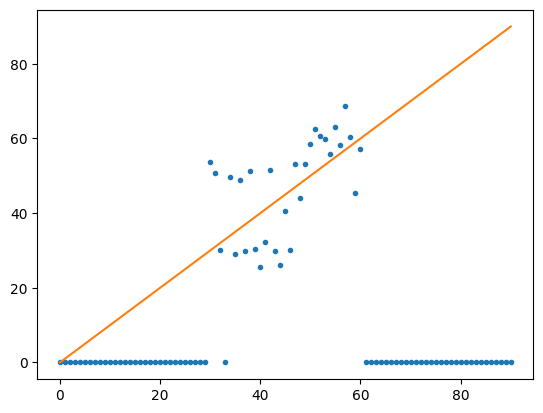

In [42]:
plt.plot(X, '.')
plt.plot([i for i in range(91)])